# Tutorial for Bayesian analysis of GW150914 event

## Data

In order to execute this tutorial, the user should have the data of GW150914 (from Hanford-LIGO datector)
available in a txt file with two columns, [t [s], strain]. If this requirement is not satisfied, it is
possible to download the strain from terminal using the command:

```
bajes_read_gwosc --ifo H1 --event GW150914 --srate 4096 --seglen 8 -o ./
 ```

Otherwise, the data can be found at this link.

In [1]:
from bajes.pipe import execute_bash

read_command = "bajes_read_gwosc --ifo H1 --event GW150914 --srate 4096 --seglen 8 -o ./"
execute_bash(read_command)

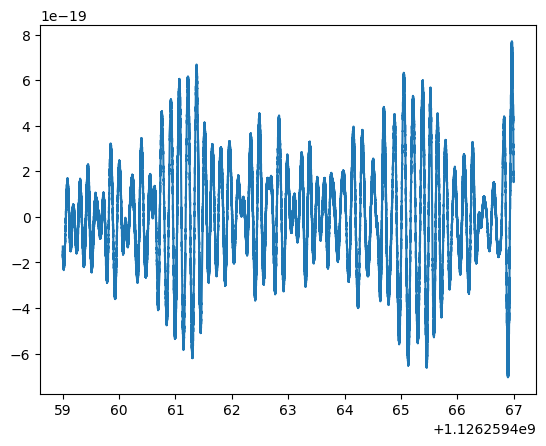

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data_file      = 'data/H1_STRAIN_8_4096_1126259463.txt'
time, strain = np.genfromtxt(data_file, unpack=True)

plt.plot(time, strain)

## Inference

The inference can be started with two commands.

```
bajes_setup -o ./run --tag gw --ifo H1 --asd GW150914 --strain ./injection/H1_STRAIN_8_4096_1126259463.txt 
--seglen 8 --srate 4096 --t-gps 126259462.0 --f-min 20 --f-max 1024 --gw-approx TEOBResumS --mc-min 12 
--mc-max 45 --q-max 8 --spin-flag align-isotropic --spin-max 0.99 
--dist-min 100. --dist-max 5000. --marg-phi-ref --marg-time-shift
```

```
python -m bajes -o ./run -I ./run/inf.pkl --checkpoint 1000 --engine dynesty --nlive 1024 --seed 1234567 --verbose
```

In [4]:
setup_command = "bajes_setup -o ./run --tag gw --ifo H1 --asd GW150914 --strain ./injection/H1_STRAIN_8_4096_1126259463.txt --seglen 8 --srate 4096 --t-gps 126259462.0 --f-min 20 --f-max 1024 --gw-approx TEOBResumS --mc-min 12 --mc-max 45 --q-max 8 --spin-flag align-isotropic --spin-max 0.99 --dist-min 100. --dist-max 5000. --marg-phi-ref --marg-time-shift"
execute_bash(setup_command)

inf_command = "python -m bajes -o ./run -I ./run/inf.pkl --checkpoint 1000 --engine dynesty --nlive 1024 --seed 1234567 --verbose"
execute_bash(inf_command)

## Postprocess

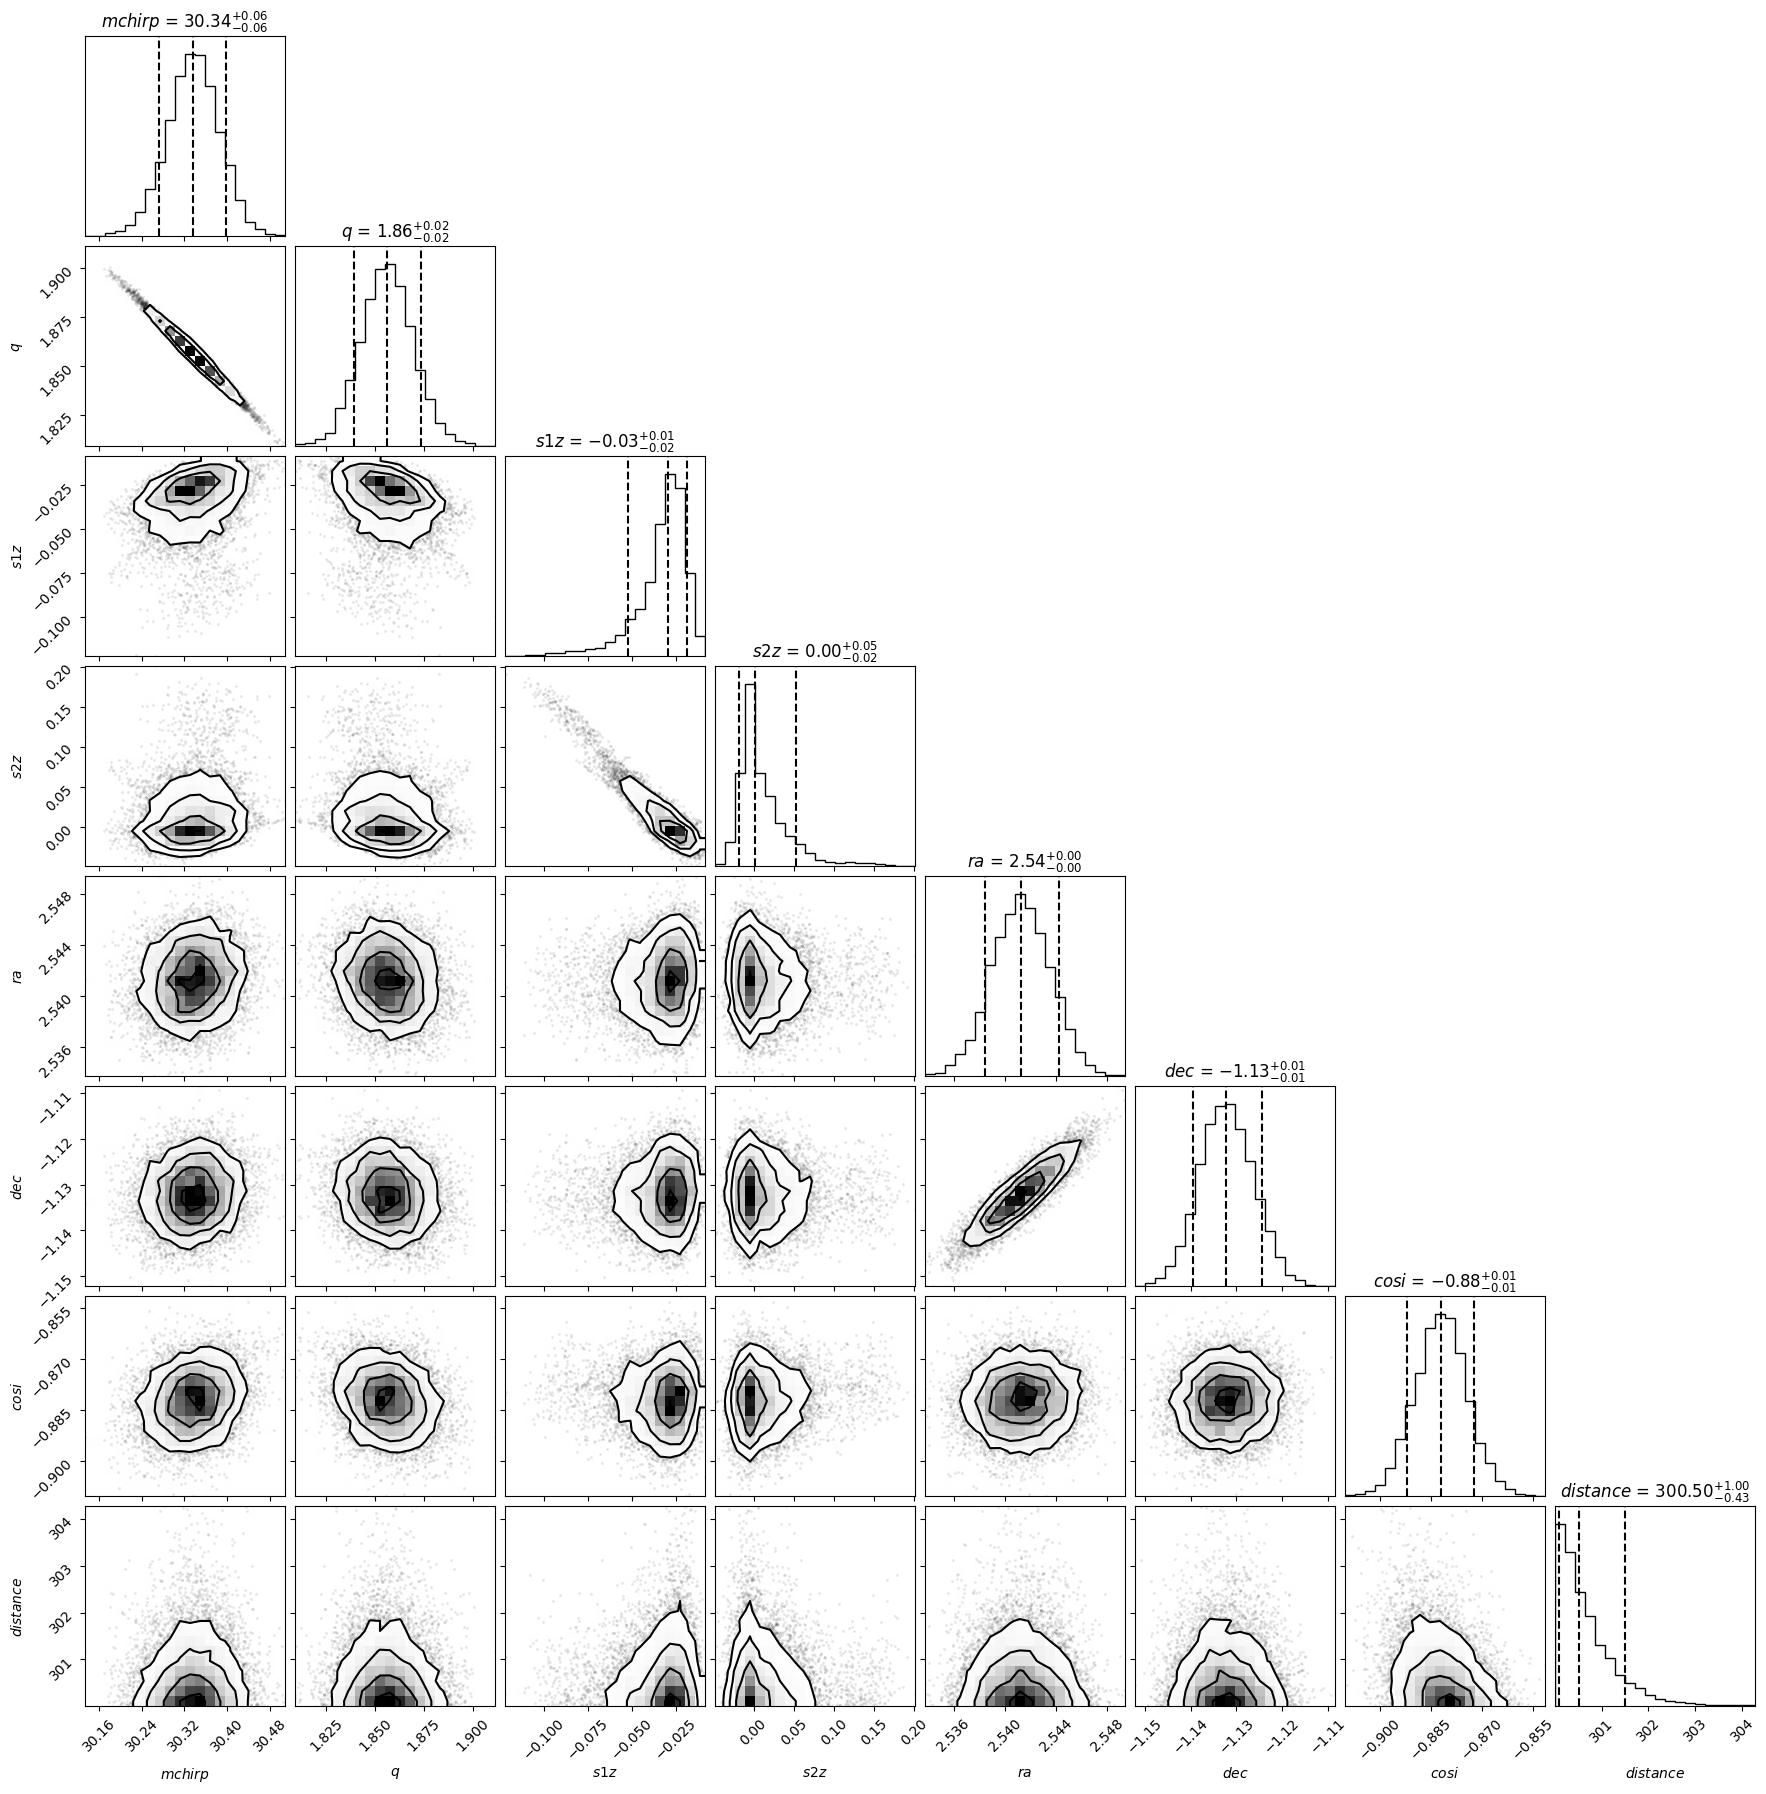

In [6]:
import numpy as np
import corner

posterior_file = './run/posterior.dat'
posterior      = np.genfromtxt(posterior_file, names=True)


figure = corner.corner(np.vstack([posterior['mchirp'], posterior['q'], posterior['s1z'],posterior['s2z'], posterior['ra'], posterior['dec'], posterior['cos_iota'], posterior['distance']]).T,
                labels=[r"$mchirp$", r"$q$", r"$s1z$", r"$s2z$", r"$ra$", r"$dec$", r"$cosi$", r"$distance$"], show_titles=True, title_kwargs={"fontsize": 12}, 
                quantiles=[0.1, 0.5, 0.9],
                )

There is also a command for the whole postprocess.

```
bajes_postproc -o ./run --verbose --spin-flag align-isotropic
```

In [ ]:
post_command = "bajes_postproc -o ./run --verbose --spin-flag align-isotropic"
execute_bash(post_command)